In [21]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression

In [3]:
tickers =["MSFT", "AAPL", "NVDA", "META", "GOOGL",
         "JPM", "BRK-B", "V", "MA", "BAC",
         "WMT","PG","NSRGY", "COST","KO",
         "XOM", "CVX","SHEL","TTE","NEE",
         "LLY","UNH", "JNJ", "MRK", "PFE"]


    # Define the start and end date for data retrieval
start_date = '2018-10-01'
end_date = '2023-09-30'  # You can adjust the end date as needed



        
df = yf.download(tickers, start=start_date, end=end_date)

df_adj_close=df['Adj Close']
for col in df_adj_close.columns:
    df_mean = df_adj_close[col].mean()
    df_adj_close[col].fillna(df_mean, inplace=True)

[*********************100%***********************]  25 of 25 completed


In [12]:
df.describe()

Adj Close                                                      \
              AAPL          BAC        BRK-B         COST          CVX   
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    114.804555    30.702962   257.792385   382.990484   113.257273   
std      47.241237     6.591599    52.544393   116.520590    33.693396   
min      34.163822    16.608324   162.130005   177.873032    46.292007   
25%      65.074505    25.616130   208.772495   282.328224    91.211655   
50%     127.832371    29.738655   261.785004   365.615356    99.837433   
75%     151.838699    35.202160   303.190010   494.120888   152.080261   
max     196.185074    47.172756   370.480011   600.377869   182.584564   

                                                                        ...  \
             GOOGL          JNJ          JPM           KO          LLY  ...   
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000  ...   
mean     94.170904   145.465794   118.271054    50.909916   222.751430  ...   
std      29.946249    18.907798    23.278687     7.421123   115.788712  ...   
min      49.233501   101.249016    70.478348    33.706718    97.388496  ...   
25%      64.696877   127.573977    95.567680    44.812439   123.102684  ...   
50%      93.900002   151.265625   118.238716    50.352242   193.284660  ...   
75%     119.694622   161.380028   139.617615    58.442429   303.612373  ...   
max     149.838501   178.456894   161.703842    63.318035   599.299988  ...   

             Volume                                                          \
              NSRGY          NVDA           PFE            PG          SHEL   
count  1.258000e+03  1.258000e+03  1.258000e+03  1.258000e+03  1.258000e+03   
mean   3.990701e+05  4.744687e+07  2.805502e+07  7.623905e+06  4.843429e+06   
std    4.094781e+05  2.139194e+07  1.511544e+07  3.299110e+06  2.407500e+06   
min    4.800000e+04  9.788400e+06  5.187683e+06  2.022100e+06  7.529140e+05   
25%    2.091000e+05  3.258720e+07  1.941405e+07  5.647000e+06  3.318568e+06   
50%    2.920000e+05  4.448535e+07  2.422466e+07  6.807000e+06  4.425504e+06   
75%    4.219500e+05  5.803540e+07  3.172575e+07  8.593125e+06  5.716941e+06   
max    7.207600e+06  2.511528e+08  2.301539e+08  3.309570e+07  2.149896e+07   

                                                                             
                TTE           UNH             V           WMT           XOM  
count  1.258000e+03  1.258000e+03  1.258000e+03  1.258000e+03  1.258000e+03  
mean   2.170850e+06  3.598092e+06  8.172278e+06  7.640237e+06  2.112923e+07  
std    1.255652e+06  2.007158e+06  3.786675e+06  4.113501e+06  1.077978e+07  
min    4.643000e+05  7.140000e+05  1.993500e+06  2.227400e+06  3.979400e+06  
25%    1.346175e+06  2.510525e+06  5.611300e+06  5.237825e+06  1.367810e+07  
50%    1.888350e+06  3.073250e+06  7.261800e+06  6.544900e+06  1.832245e+07  
75%    2.625400e+06  4.060250e+06  9.679725e+06  8.761700e+06  2.618502e+07  
max    1.269700e+07  2.736140e+07  3.837960e+07  4.431340e+07  8.443940e+07  

[8 rows x 150 columns]

In [11]:
df_adj_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-10-01 to 2023-09-29
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1258 non-null   float64
 1   BAC     1258 non-null   float64
 2   BRK-B   1258 non-null   float64
 3   COST    1258 non-null   float64
 4   CVX     1258 non-null   float64
 5   GOOGL   1258 non-null   float64
 6   JNJ     1258 non-null   float64
 7   JPM     1258 non-null   float64
 8   KO      1258 non-null   float64
 9   LLY     1258 non-null   float64
 10  MA      1258 non-null   float64
 11  META    1258 non-null   float64
 12  MRK     1258 non-null   float64
 13  MSFT    1258 non-null   float64
 14  NEE     1258 non-null   float64
 15  NSRGY   1258 non-null   float64
 16  NVDA    1258 non-null   float64
 17  PFE     1258 non-null   float64
 18  PG      1258 non-null   float64
 19  SHEL    1258 non-null   float64
 20  TTE     1258 non-null   float64
 21  UNH     1258 non-nu

In [10]:
df_adj_close.describe()

,AAPL,BAC,BRK-B,COST,CVX,GOOGL,JNJ,JPM,KO,LLY,...,NSRGY,NVDA,PFE,PG,SHEL,TTE,UNH,V,WMT,XOM
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,...,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,114.804555,30.702962,257.792385,382.990484,113.257273,94.170904,145.465794,118.271054,50.909916,222.751430,...,106.900141,156.421613,37.483352,123.867629,45.826280,43.324098,367.324258,196.191760,126.264989,66.749511
std,47.241237,6.591599,52.544393,116.520590,33.693396,29.946249,18.907798,23.278687,7.421123,115.788712,...,14.526912,108.781790,6.980495,21.470452,10.495563,9.529297,109.818665,29.793153,20.108538,24.947107
min,34.163822,16.608324,162.130005,177.873032,46.292007,49.233501,101.249016,70.478348,33.706718,97.388496,...,71.638794,31.525995,23.706854,68.884911,19.055691,19.153252,185.314621,117.899185,79.268562,26.121841
25%,65.074505,25.616130,208.772495,282.328224,91.211655,64.696877,127.573977,95.567680,44.812439,123.102684,...,97.339443,59.750538,32.099615,108.965153,37.162479,38.074560,259.587692,175.503513,111.102974,51.086250
50%,127.832371,29.738655,261.785004,365.615356,99.837433,93.900002,151.265625,118.238716,50.352242,193.284660,...,109.466850,135.694885,35.198454,127.713451,49.090858,41.431314,358.204987,202.088013,132.092773,59.025103
75%,151.838699,35.202160,303.190010,494.120888,152.080261,119.694622,161.380028,139.617615,58.442429,303.612373,...,118.808254,212.296574,42.843708,140.422703,53.104095,48.199291,479.623718,219.756176,140.532166,86.704191
max,196.185074,47.172756,370.480011,600.377869,182.584564,149.838501,178.456894,161.703842,63.318035,599.299988,...,134.475769,493.509338,57.513687,157.220627,65.820000,66.839996,547.095337,248.110001,165.250000,120.199997


In [13]:
daily_returns = df_adj_close.pct_change().dropna()
daily_returns

,AAPL,BAC,BRK-B,COST,CVX,GOOGL,JNJ,JPM,KO,LLY,...,NSRGY,NVDA,PFE,PG,SHEL,TTE,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-02,0.008889,-0.002361,0.002374,0.007245,0.002814,-0.000736,0.005655,0.004141,0.006057,0.003346,...,-0.000838,-0.009953,-0.001130,0.008247,-0.003607,-0.008099,0.005686,-0.007428,0.007945,0.007575
2018-10-03,0.012168,0.014199,0.005156,-0.013328,0.004569,0.003221,-0.010322,0.009388,-0.013760,0.006113,...,0.001438,0.000873,0.013342,-0.015766,0.005936,-0.000308,0.000998,-0.002005,-0.011351,-0.003586
2018-10-04,-0.017581,0.014333,0.011876,-0.006518,-0.002873,-0.028443,0.002302,0.009016,-0.000436,0.040232,...,-0.013159,-0.025948,-0.002455,-0.013369,-0.003598,-0.007551,-0.009524,-0.017473,0.001488,-0.006616
2018-10-05,-0.016229,-0.006572,0.002238,-0.055508,0.003041,-0.007850,-0.001794,-0.005639,0.000654,0.017966,...,-0.012729,-0.033764,0.004698,0.002808,-0.012711,-0.012733,0.003280,-0.009539,-0.009553,-0.002804
2018-10-08,-0.002318,0.001323,0.011847,0.023353,-0.003910,-0.010198,0.002085,0.006107,0.013077,0.003826,...,0.002701,-0.015156,0.008239,0.003043,-0.009802,-0.020289,-0.000706,-0.023872,0.014790,0.009257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,0.007380,-0.001447,0.004304,0.000054,0.014614,0.006603,-0.001495,0.004941,-0.010417,0.003179,...,-0.004500,0.014708,0.008871,-0.006069,0.002945,0.008840,0.008259,-0.007317,0.004435,0.011223
2023-09-26,-0.023398,-0.015580,-0.006331,-0.010132,-0.005394,-0.019373,-0.007737,-0.010379,-0.008246,-0.004128,...,-0.017058,-0.007366,-0.017586,-0.008894,-0.012363,-0.012086,-0.009465,-0.015898,-0.003495,0.001549
2023-09-27,-0.008897,0.003681,-0.004563,0.019115,0.019309,0.015322,-0.012011,0.005865,-0.010260,-0.000455,...,-0.026898,0.013290,-0.009259,-0.013260,0.015803,0.012540,-0.003403,-0.000653,-0.004800,0.032557


In [14]:
daily_returns.describe()

,AAPL,BAC,BRK-B,COST,CVX,GOOGL,JNJ,JPM,KO,LLY,...,NSRGY,NVDA,PFE,PG,SHEL,TTE,UNH,V,WMT,XOM
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,...,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.001133,0.000285,0.000490,0.000871,0.000671,0.000820,0.000277,0.000521,0.000368,0.001533,...,0.000388,0.002013,0.000099,0.000638,0.000396,0.000501,0.000738,0.000530,0.000585,0.000689
std,0.021010,0.022567,0.014186,0.015397,0.022458,0.020266,0.012977,0.020295,0.013507,0.019497,...,0.011552,0.034027,0.016727,0.013684,0.023472,0.021821,0.018924,0.018308,0.013985,0.021662
min,-0.128647,-0.153973,-0.095921,-0.124513,-0.221248,-0.116341,-0.100378,-0.149649,-0.096725,-0.099986,...,-0.081830,-0.187559,-0.077346,-0.087374,-0.171722,-0.178209,-0.172769,-0.135472,-0.113758,-0.122248
25%,-0.009103,-0.010653,-0.006297,-0.006378,-0.008899,-0.008987,-0.005618,-0.008893,-0.005383,-0.008137,...,-0.005805,-0.015947,-0.009164,-0.005640,-0.010140,-0.010206,-0.007929,-0.008548,-0.005807,-0.010885
50%,0.001172,0.000316,0.000660,0.001548,0.000754,0.000960,0.000224,0.000352,0.000642,0.001398,...,0.000778,0.002386,-0.000531,0.000873,0.000311,0.000706,0.000856,0.001134,0.000610,0.000694
75%,0.012643,0.010848,0.007309,0.008233,0.010097,0.010932,0.006199,0.009660,0.006705,0.010019,...,0.006944,0.019959,0.008415,0.007289,0.011177,0.011172,0.008997,0.009073,0.007004,0.011603
max,0.119808,0.177962,0.116099,0.099594,0.227407,0.096202,0.079977,0.180125,0.064796,0.156798,...,0.058754,0.243696,0.108552,0.120090,0.196795,0.152756,0.127989,0.138427,0.117085,0.126868


In [15]:
covar_matrix_daily= daily_returns.cov()
covar_matrix_daily

,AAPL,BAC,BRK-B,COST,CVX,GOOGL,JNJ,JPM,KO,LLY,...,NSRGY,NVDA,PFE,PG,SHEL,TTE,UNH,V,WMT,XOM
AAPL,0.000441,0.000219,0.000174,0.000186,0.000175,0.000293,0.000111,0.000198,0.000122,0.000139,...,0.000098,0.000464,0.000119,0.000125,0.000153,0.000157,0.000187,0.000243,0.000117,0.000153
BAC,0.000219,0.000509,0.000246,0.000113,0.000326,0.000211,0.000115,0.000418,0.000155,0.000108,...,0.000075,0.000297,0.000135,0.000118,0.000304,0.000299,0.000203,0.000254,0.000092,0.000304
BRK-B,0.000174,0.000246,0.000201,0.000104,0.000209,0.000156,0.000100,0.000227,0.000121,0.000104,...,0.000063,0.000216,0.000109,0.000100,0.000191,0.000180,0.000153,0.000177,0.000085,0.000188
COST,0.000186,0.000113,0.000104,0.000237,0.000084,0.000160,0.000092,0.000104,0.000095,0.000103,...,0.000073,0.000250,0.000085,0.000109,0.000068,0.000069,0.000127,0.000132,0.000135,0.000074
CVX,0.000175,0.000326,0.000209,0.000084,0.000504,0.000171,0.000108,0.000294,0.000138,0.000111,...,0.000057,0.000236,0.000119,0.000080,0.000418,0.000356,0.000202,0.000218,0.000070,0.000418
GOOGL,0.000293,0.000211,0.000156,0.000160,0.000171,0.000411,0.000093,0.000186,0.000108,0.000119,...,0.000088,0.000436,0.000108,0.000104,0.000162,0.000158,0.000166,0.000227,0.000096,0.000145
JNJ,0.000111,0.000115,0.000100,0.000092,0.000108,0.000093,0.000168,0.000108,0.000097,0.000130,...,0.000056,0.000102,0.000116,0.000105,0.000083,0.000080,0.000128,0.000106,0.000077,0.000088
JPM,0.000198,0.000418,0.000227,0.000104,0.000294,0.000186,0.000108,0.000412,0.000148,0.000102,...,0.000070,0.000262,0.000127,0.000108,0.000281,0.000274,0.000187,0.000231,0.000081,0.000264
KO,0.000122,0.000155,0.000121,0.000095,0.000138,0.000108,0.000097,0.000148,0.000182,0.000096,...,0.000072,0.000119,0.000098,0.000119,0.000129,0.000125,0.000123,0.000136,0.000076,0.000124
LLY,0.000139,0.000108,0.000104,0.000103,0.000111,0.000119,0.000130,0.000102,0.000096,0.000380,...,0.000076,0.000153,0.000148,0.000109,0.000082,0.000088,0.000164,0.000121,0.000087,0.000104


In [17]:
correlation_matrix = daily_returns.corr()
correlation_matrix

,AAPL,BAC,BRK-B,COST,CVX,GOOGL,JNJ,JPM,KO,LLY,...,NSRGY,NVDA,PFE,PG,SHEL,TTE,UNH,V,WMT,XOM
AAPL,1.000000,0.462245,0.584732,0.574582,0.370720,0.688886,0.406092,0.464152,0.429485,0.338642,...,0.405573,0.648852,0.338802,0.435382,0.311076,0.343058,0.469424,0.632150,0.396792,0.335425
BAC,0.462245,1.000000,0.769611,0.325750,0.644081,0.460932,0.392630,0.913759,0.509949,0.245097,...,0.286883,0.386900,0.358520,0.382318,0.573296,0.607323,0.476513,0.614166,0.292579,0.621005
BRK-B,0.584732,0.769611,1.000000,0.476160,0.656971,0.543482,0.545172,0.786972,0.633586,0.376956,...,0.384656,0.447950,0.459252,0.515938,0.572974,0.581836,0.568664,0.682530,0.429545,0.611290
COST,0.574582,0.325750,0.476160,1.000000,0.242973,0.512192,0.458078,0.332373,0.458739,0.342844,...,0.407726,0.477913,0.331550,0.518782,0.187186,0.205495,0.436355,0.467951,0.625947,0.222343
CVX,0.370720,0.644081,0.656971,0.242973,1.000000,0.375799,0.372156,0.645900,0.453453,0.253628,...,0.219942,0.309260,0.316127,0.261543,0.792420,0.727223,0.476261,0.531123,0.221422,0.859609
GOOGL,0.688886,0.460932,0.543482,0.512192,0.375799,1.000000,0.354319,0.451807,0.395028,0.302362,...,0.377887,0.632987,0.319383,0.374880,0.339718,0.356802,0.432397,0.613100,0.338577,0.329499
JNJ,0.406092,0.392630,0.545172,0.458078,0.372156,0.354319,1.000000,0.409316,0.556037,0.512700,...,0.375290,0.231733,0.532121,0.590563,0.271701,0.284110,0.521341,0.445710,0.426072,0.312799
JPM,0.464152,0.913759,0.786972,0.332373,0.645900,0.451807,0.409316,1.000000,0.540379,0.256929,...,0.299188,0.380020,0.374286,0.388795,0.589349,0.619309,0.486326,0.622315,0.286857,0.600060
KO,0.429485,0.509949,0.633586,0.458739,0.453453,0.395028,0.556037,0.540379,1.000000,0.366065,...,0.463563,0.259503,0.433618,0.645743,0.405880,0.422452,0.479642,0.548173,0.403607,0.424409
LLY,0.338642,0.245097,0.376956,0.342844,0.253628,0.302362,0.512700,0.256929,0.366065,1.000000,...,0.336789,0.230886,0.453600,0.408591,0.178795,0.207906,0.445085,0.337604,0.317636,0.247393


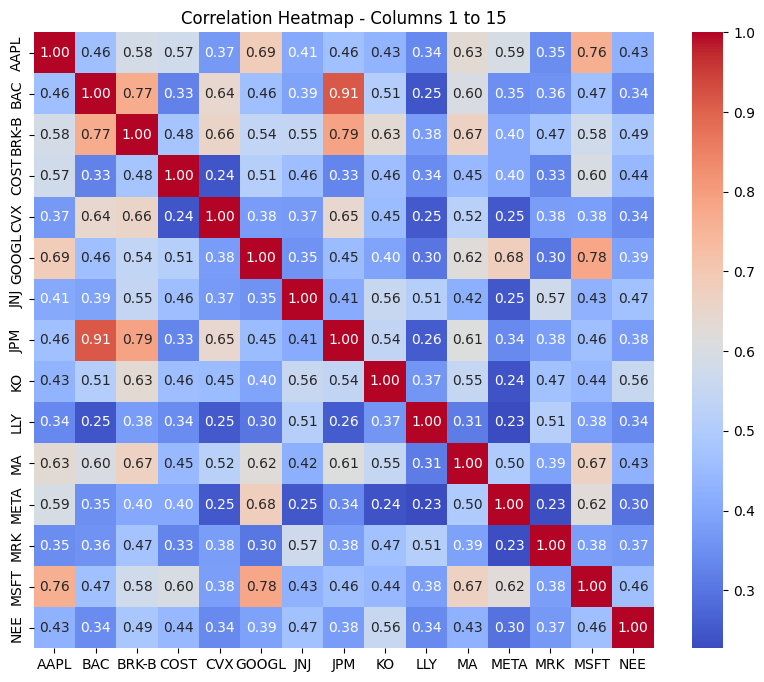

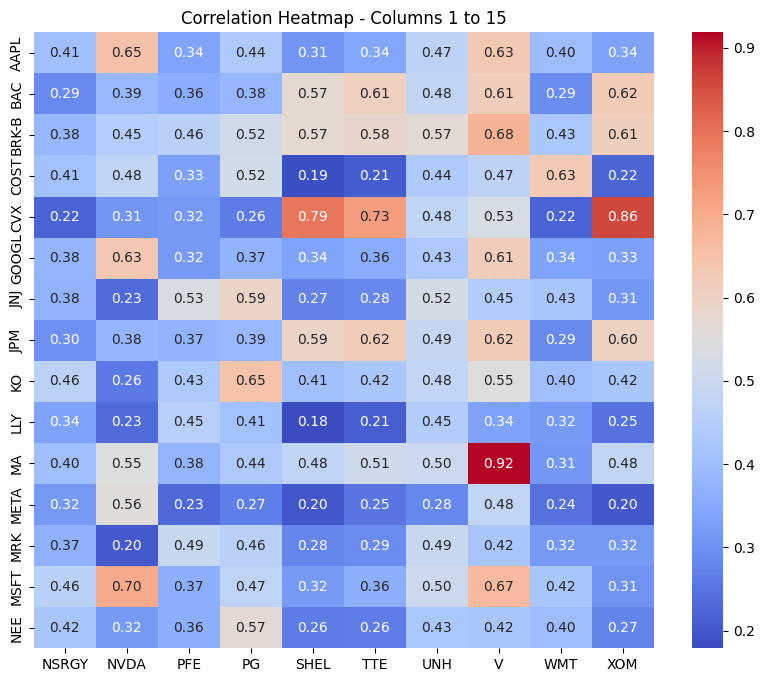

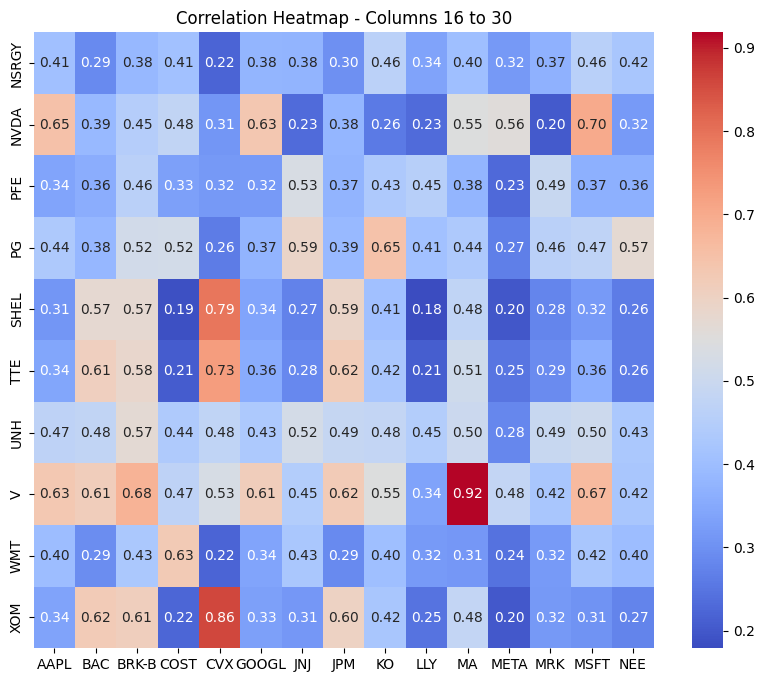

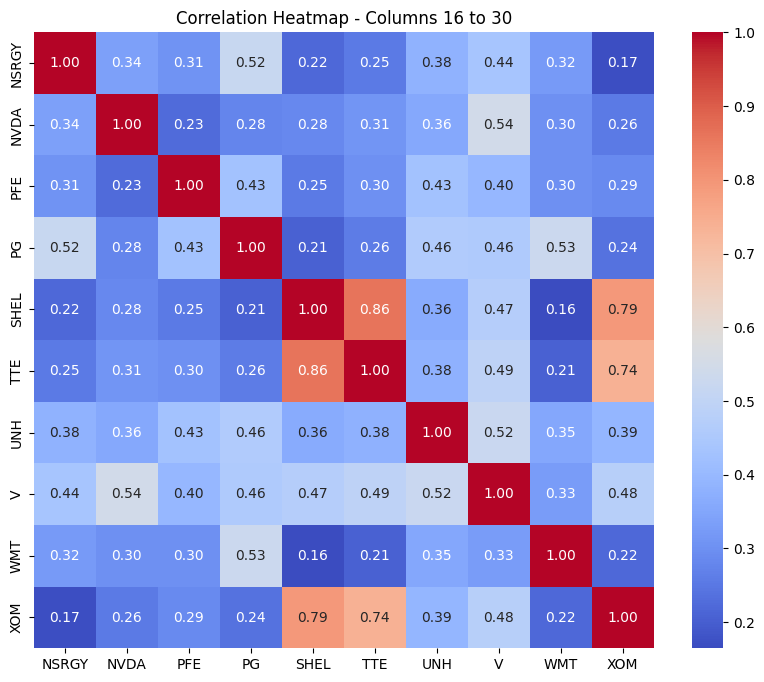

In [22]:
heatmap_segment_size = 15
num_columns = len(correlation_matrix.columns)
for i in range(0, num_columns, heatmap_segment_size):
    for j in range(0, num_columns, heatmap_segment_size):
        subset_corr_matrix = correlation_matrix.iloc[i:i+heatmap_segment_size, j:j+heatmap_segment_size]

        plt.figure(figsize=(10, 8))
        sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Heatmap - Columns {} to {}".format(i+1, i+heatmap_segment_size))
        plt.show()